Load and explore dataset, do necessary pre-processing and split the dataset into training 
set and test set with an appropriate ratio. Explain the steps that you have taken (e.g. show 
dataset size, dealing with missing values, feature exploration and representation, label 
distribution, split dataset etc).

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("garments_worker_productivity.csv")
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [2]:
x = df.iloc[:, 4:-1]
y = df.iloc[:,-1]
x[np.isnan(x)] = 0

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

print(scaler.transform(x))

[[0.63636364 1.         0.45025165 ... 0.         0.         0.65517241]
 [0.         0.93150685 0.02013163 ... 0.         0.         0.06896552]
 [0.90909091 1.         0.16473093 ... 0.         0.         0.32758621]
 ...
 [0.54545455 0.79452055 0.01935734 ... 0.         0.         0.06896552]
 [0.72727273 0.93150685 0.         ... 0.         0.         0.14942529]
 [0.45454545 0.8630137  0.         ... 0.         0.         0.04597701]]


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("Train shape: ",X_train.shape)
print("Test shape: ",X_test.shape)

Train shape:  (837, 10)
Test shape:  (360, 10)


Based on the training data, create three supervised machine learning (ML) models for 
predicting actual_productivity.

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.metrics import accuracy_score

knn_model = KNeighborsRegressor(n_neighbors=5)

#Fit the model using our training data
knn_model.fit(X_train, y_train)

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.11343890896430571

In [6]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.1374115738373527

In [7]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rf_gs = GridSearchCV(estimator=knn_model, param_grid=grid, n_jobs=-1, scoring='neg_mean_squared_error',error_score=0)

rf_gs.fit(X_train, y_train)

best_model = rf_gs.best_estimator_
mean_squared_error(best_model.predict(X_test), y_test)

0.020401235994148736

In [8]:
mean_squared_error(best_model.predict(X_train), y_train)

0.015677360911351947

In [9]:
from sklearn.svm import SVR
from sklearn import svm

parameters_dictionary = {'kernel':['linear', 'rbf'], 'C':[0.0001, 1, 10], 'gamma':[1, 10, 100]}
svr = SVR()

grid_search = GridSearchCV(svr, parameters_dictionary, return_train_score=True, cv = 5, verbose = 1, scoring='explained_variance',error_score='raise')
grid_search.fit(X_train, y_train)

best_model2 = grid_search.best_estimator_
mean_squared_error(best_model2.predict(X_test), y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


0.02006012716333887

In [10]:
mean_squared_error(best_model2.predict(X_train), y_train)

0.012384285885946027

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

regr.predict(X_test)
regr.score(X_test, y_test)

0.21433378846045814

In [12]:
from sklearn.tree import DecisionTreeRegressor 

treereg = DecisionTreeRegressor(random_state=0)

treereg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [13]:
y_pred = treereg.predict(X_test)
  
# print the predicted price
print(y_pred)

[0.60071061 0.80003139 0.66629972 0.5759     0.54072917 0.80098039
 0.44872222 0.44872222 0.65019865 0.75039551 0.80053448 0.91158974
 0.80059447 0.90808081 0.90014152 0.99138889 1.00023041 0.60103709
 0.63040292 0.94072542 1.00023041 0.70071042 0.93903333 0.75571389
 0.93034038 0.36107143 0.75548611 1.00023041 0.70005833 0.89284722
 0.95018596 0.80040196 0.87555556 0.79263333 0.70025078 0.41155357
 0.79675556 0.80059447 0.80040196 0.72872917 0.80030279 0.85050231
 0.68184186 0.90032111 0.75065101 0.80040196 0.41989583 1.01783333
 0.80014865 0.86262121 0.80061268 0.8        0.59289063 0.8
 0.59289063 0.64998328 0.57496528 0.75047368 0.89284722 0.90939167
 0.67536222 0.97462121 0.52681035 0.79657143 0.50080172 0.73708333
 0.80038636 0.93034038 0.4321229  0.70061823 0.80064381 0.74290124
 0.70048083 0.71220525 0.75054546 0.66068329 0.80023784 0.69996522
 1.05962121 0.80061268 0.8000345  0.94070106 0.85036207 0.67536222
 0.75003797 0.36605352 0.70001988 0.86262121 1.00045747 0.49654971
 0

In [14]:
param_grid = {"max_depth": np.arange(2, 10, 1)}

tree_reg = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv=4, n_jobs=-1, verbose=1, scoring = "neg_mean_squared_error")

tree_reg.fit(X_train, y_train)

best_model3 = tree_reg.best_estimator_
mean_squared_error(best_model3.predict(X_test), y_test)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


0.02172418777523458

In [15]:
mean_squared_error(best_model3.predict(X_train), y_train)

0.01478299506846913

In [16]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
 
# create regressor object
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200], 'max_depth' : [None, 10, 20, 30]}

rf_gs = GridSearchCV(estimator=regressor, param_grid=params_rf, cv=5, scoring = "neg_mean_squared_error", error_score='raise')
#fit model to training data
rf_gs.fit(X_train, y_train)

best_model4 = rf_gs.best_estimator_

In [17]:
mean_squared_error(best_model4.predict(X_test), y_test)

0.01649823541122549

In [18]:
mean_squared_error(best_model4.predict(X_train), y_train)

0.0056328234433409416

Analyse the importance of the features for predicting actual_productivity using two 
different approaches. Give statistical reasons of your findings.

In [19]:
import pandas as pd
import numpy as np
importances = best_model4.feature_importances_
print(importances)

[0.11527549 0.29661608 0.1652415  0.03890305 0.1242086  0.1233185
 0.00877731 0.01514752 0.00433447 0.10817748]


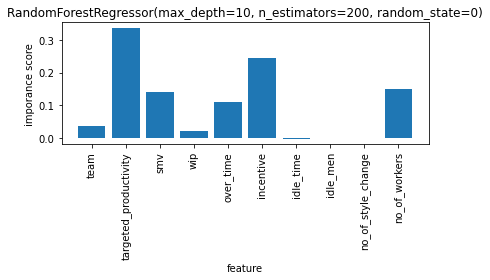

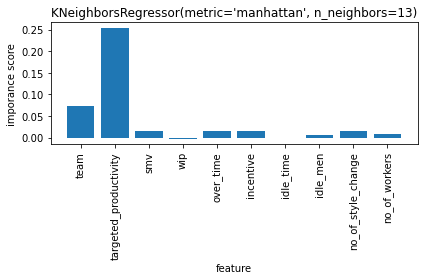

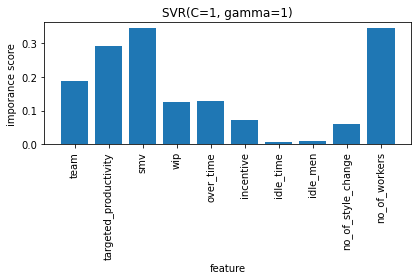

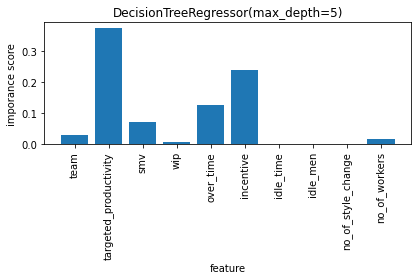

In [20]:
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

model_list = {best_model, best_model2, best_model3, best_model4}

for models in model_list:
    perm = permutation_importance(models, X_test, y_test, n_repeats=10, random_state=42)

    X_train = pd.DataFrame(X_train, columns = x.columns)

    importance_score = perm.importances_mean
    feature_name = list(X_train.columns)

    plt.bar(feature_name, importance_score)
    plt.xticks(rotation = 'vertical')

    plt.xlabel("feature")
    plt.ylabel("imporance score")
    plt.title(str(models))
    plt.tight_layout()
    plt.show()